<h1><center>MSDS 7331: Data Mining Lab 1</center></h1>
<h3><center>Noelle Brown, John Heinen, Lizzy Sterling, and Matthew Rega</center></h3>

___

# Contents
### [Business Understanding](#Business Understanding)
### [Data Meaning Type](#Data Meaning Type)
### [Data Quality](#Data Quality)
### [Simple Statistics](#Simple Statistics)
### [Visualize Attributes](#Visualize Attributes)
### [Explore Joint Attributes](#Explore Joint Attributes)
### [Explore Attributes and Class](#Explore Attributes and Class)
### [New Features](#New Features)
### [Exceptional Work](#Exceptional Work)

___

# Business Understanding

<a id='Business Understanding'></a>

Education is an industry that affects us all; we all attended school and many of our children are immersed in the education system today. As a team of a public-school teacher, parents of school-aged children, and an individual with a background in sociology, this topic peaked our interest since we know data science has the potential to improve this industry and make a difference in the educations of future generations. Dr. Jake Drew compiled this dataset into an open source repository from multiple locations at http://www.ncpublicschools.org. The data has information available to the public about school statistics and performance at the local, district, and state levels in North Carolina. The [John M. Belk Endowment](http://jmbendowment.org/), whose primary goal is to increase educational attainment in North Carolina public schools, makes this project possible. According to their website, the Endowment aims “to increase the proportion of North Carolinians attaining degrees, certificates, and other high quality credentials to 60% by 2025.” All analysis done on this data will aim to support this goal and understand and predict factors that increase student graduation rates and educational success. Specifically, our team will focus on predicting graduation rates and analyzing factors that impact predicted graduation rates. We will know we have minded useful knowledge from this dataset by identifying variables that influence graduation rates, as this will lead us to understand the most important factors that contribute to school success. We are interested in specifically identifying factors that influence graduation rates among minority students and schools that have a high percent of minority students. The prediction algorithm will be measured by analyzing metrics that indicate our prediction accuracy levels from our regression such as the mean absolute error (MAE), the root mean squared error (RMSE), and the Mean Absolute Percentage Error (MAPE) using a ten-fold cross-validation technique.

___

# Data Meaning Type

<a id='Data Meaning Type'></a>

The following lists definitions and data types for a subset of attributes that we believe are important for this analysis. For a complete list of variables and their types, see below. For a complete list of variables and definitions for the raw dataset, go to [this link](https://github.com/jakemdrew/EducationDataNC/blob/master/Data%20Documentation/data-dictionary.pdf).

**Attribute Name** | **Description** | **Data Type**
:--- | :--- | :---
4-Year Cohort Graduation Rate Score | Percent of students that graduated in 4 years | Percentage
GraduationRate_5yr | Percent of students that graduated in 5 years | Percentage
MinorityPct | School Minority Percent (Black, Hispanic, Pacific Islander, and Two or More Races) | Percentage
student_num | Number of students at school, LEA (district), and state level | Numeric
Size | Average class/course size | Numeric
avg_daily_attend_pct | Average daily attendance at school, LEA, and state level | Percentage
lea_total_expense_num | Total expense at LEA level | Dollar Value
lea_salary_expense_pct | Expense spent on Salaries at LEA level | Percentage
lea_services_expense_pct | Expense spent on Services at LEA level | Percentage
lea_supplies_expense_pct | Expense spent on Supplies at LEA level | Percentage
lea_instruct_equip_exp_pct | Expense spent on Instructional Equipment at LEA level | Percentage
perpupil_num | Expense per pupil at school, LEA, and state level | Dollar Value
ACT Score | Average ACT Score | Percentage
SPG Score | School Performance Grade Score | Numeric
sat_avg_score_num | Average SAT Score (Critical Reading + Math) | Numeric Value from 0-1600
sat_participation_pct | High School Seniors taking the SAT at the School Level | Percentage
ap_participation_pct | High School Students taking an AP exam | Percentage
ap_pct_3_or_above | AP Exams with Scores of 3 or Above at the School Level | Percentage
total_specialized_courses | Students enrolled in at least one specialized course | Percentage
cte_courses | Students enrolled in at least one Career and Technical Education (CTE) course | Percentage
univ_college_courses | Students enrolled in at least one course at a community college or university | Percentage
crime_per_c_num | Number of crimes or acts of violence per 100 students| Numeric
short_susp_per_c_num | Short term suspensions per 100 students | Numeric
long_susp_per_c_num | Long term suspensions per 100 students | Numeric
expelled_per_c_num | Expulsions per 100 students | Numeric
stud_internet_comp_num | Ratio of students to internet connected computer | Ratio
flicensed_teach_pct | Teachers that meet NC fully licensed definition | Percentage
1yr_tchr_trnovr_pct | One Year Teacher turnover | Percentage
tchyrs_0thru3_pct | Teachers with 0-3 years of experience | Percentage
tchyrs_4thru10_pct | Teachers with 4-10 years of experience | Percentage
tchyrs_11plus_pct | Teachers with 11 or more years of experience | Percentage
nbpts_num | National Board Certified Staff | Numeric
advance_dgr_pct | Teachers with masters or higher degree | Percentage
lateral_teach_pct | Lateral entry teacher percentage | Percentage
0-3 Years_LEA_Exp_Pct_Prin | Principals with 0-3 years of experience at the district level | Percentage
4-10 Years_LEA_Exp_Pct_Prin | Principals with 4-10 years of experience at the district level | Percentage
10+ Years_LEA_Exp_Pct_Prin | Principals with more than 10 years of experience at the district level | Percentage

In [67]:
# Import necessary packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

# Import Cleaned 2017 High School Movie Data
url = 'https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/2017/Machine%20Learning%20Datasets/PublicHighSchools2017_ML.csv'
PublicHighSchools2017_ML = pd.read_csv(url)

# Create new dataframe without including graduation rates of 0
schooldata17 = PublicHighSchools2017_ML[PublicHighSchools2017_ML['4-Year Cohort Graduation Rate Score'] != 0]
schooldata17 = schooldata17[schooldata17.GraduationRate_5yr_All != 0]

In [12]:
# View all attribute names and data types
schooldata17.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 469
Data columns (total 403 columns):
student_num                                              float64
lea_avg_student_num                                      float64
st_avg_student_num                                       float64
09_Size                                                  float64
10_Size                                                  float64
11_Size                                                  float64
12_Size                                                  float64
Biology_Size                                             float64
English II_Size                                          float64
Math I_Size                                              float64
lea_total_expense_num                                    float64
lea_salary_expense_pct                                   float64
lea_services_expense_pct                                 float64
lea_supplies_expense_pct                         

___

# Data Quality

<a id='Data Quality'></a>

Dr. Drew has created Machine Learning datasets that provide cleaned data based on his recommendations. We will use his code (which can be viewed [here](http://nbviewer.jupyter.org/github/jakemdrew/EducationDataNC/blob/master/2017/Machine%20Learning%20Datasets/Source%20Code/PublicHighSchools2017_ML.ipynb)) and these cleaned datasets in our analysis – the following explains in detail how the data was processed in these datasets. We will analyze the 2017 dataset, although we may use the other years in further analysis if we are interested in looking at trends over time. 

First, only public school data is selected, as charter schools have too many missing fields. As part of a future analysis, it would be interesting to gather more charter school information and compare this with our public school analysis or analyze whether the rise of charter schools have an impact on the racial profiles of public schools. Since there are many missing values in the raw datasets, all columns that have a missing data percentage greater than 60% are deleted. Our team agreed with this threshold and decided to keep this percentage. Columns that have the same data in every row as well as columns that have all different values in each row are deleted, as these do not provide us with useful information for machine learning. This process deletes 135 columns in total (134 have the same value, 2 have unique values). Columns that are entirely empty are removed, although there are no columns in this dataset that this applies to. Then, any columns that have greater than 25 unique values are deleted, as this does not provide useful information for prediction; our team also agreed that this was a good threshold. This removes 10 columns from the original dataset, which allows for one-hot encoding, where each categorical variable is converted to one of 68 new numeric columns to aid with model creation. All remaining missing values besides the race information are set to 0, since many schools do not report scores or values of 0. For now, this is a decent imputation technique, but in the future we might impute certain values with means or other metrics as we feel would aid with our analysis. To deal with missing race data, the race values are filled with the district average and these variables are converted to percent values. To ensure that there is no duplicate or highly correlated data, any variables that are correlated with another variable at least 95% are analyzed by looking at the upper triangle of the correlation matrix. Since there are 211 highly correlated fields, 138 are dropped from our machine learning dataset. The final machine learning dataset provides us with 403 columns and 470 observations. We may bring a few of these dropped variables back into the dataset depending on our analysis and to further verify data quality. 

We noticed that there were no schools with a graduation rate between 95-99%, which seemed suspicious since every other high percent value had at least one school listed. After bringing the GraduationRate_4yr_ALL variable back into the dataset, we were able to verify that these values were missing from every column. With the help of Dr. Drew, we discovered that this information was originally masked in order to protect student anonymity and set to 100% if the value was “>95%”, so we do not have access to these specific percentages. This is an interesting quality to note as we begin our analysis and prediction. Please see the [exceptional work section](#Exceptional Work) for a visualization of this analysis. 

Additionally, our team decided to remove all instances where the graduation rate was equal to 0%. The rational behind this decision was that it seems highly unlikely that no one would graduate out of an entire school. These values were most likely originally missing and imputed with 0. We will assume these outliers are either mistakes or part of a different population that will not aid in our prediction, so we will remove these schools. The final processed dataset of 403 variables with 455 observations will allow for optimal prediction models.

___

# Simple Statistics

<a id='Simple Statistics'></a>

For this section, we will view the count, mean, standard deviation, minimum, maximum, and quartile values for various related fields. These metrics are meaningful as they allow us to quickly compare attributes at the school, district, and state level and allow us to see the measures of center and variation for the data.

### School and Class Size

In [13]:
# Get statistics on variables that relate to size
sizevars = schooldata17[['4-Year Cohort Graduation Rate Score','student_num','lea_avg_student_num','st_avg_student_num','09_Size',
                                               '10_Size','11_Size','12_Size','Biology_Size','English II_Size','Math I_Size','avg_daily_attend_pct','lea_avg_daily_attend_pct','st_avg_daily_attend_pct']]
sizevars.describe()

,4-Year Cohort Graduation Rate Score,student_num,lea_avg_student_num,st_avg_student_num,09_Size,10_Size,11_Size,12_Size,Biology_Size,English II_Size,Math I_Size,avg_daily_attend_pct,lea_avg_daily_attend_pct,st_avg_daily_attend_pct
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,90.830769,853.050549,824.738462,834.037363,18.316484,17.771429,17.542857,16.138462,18.487912,19.439560,18.145055,0.943053,0.943462,0.946185
std,7.273749,590.092589,356.370408,97.338530,7.475721,8.303737,8.491887,8.960790,5.069491,5.113274,5.336357,0.024862,0.007657,0.001024
min,69.000000,57.000000,105.000000,278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.845000,0.911000,0.946000
25%,86.000000,333.500000,577.000000,853.000000,16.000000,16.000000,15.000000,12.500000,15.000000,17.000000,16.000000,0.928000,0.938000,0.946000
50%,91.000000,776.000000,812.000000,853.000000,20.000000,20.000000,20.000000,19.000000,19.000000,20.000000,18.000000,0.942000,0.944000,0.946000
75%,100.000000,1214.000000,972.000000,853.000000,23.000000,23.000000,24.000000,22.500000,22.000000,23.000000,22.000000,0.956000,0.948000,0.946000
max,100.000000,2966.000000,1852.000000,853.000000,33.000000,52.000000,30.000000,36.000000,30.000000,30.000000,32.000000,1.000000,0.971000,0.954000


It is interesting to note that the mean class sizes for all grades are less than 20 students, as this indicative of reasonable classes. However, the maximum class size is 52 in 10th grade, which could be something to look into, as this is a very large average class size. This could be a large lowerclassmen seminar or advisory course.

In [26]:
# Find mode of Graduation Rate
from statistics import mode
from statistics import median
gradmode = mode(schooldata17['4-Year Cohort Graduation Rate Score'])
gradmed = median(schooldata17['4-Year Cohort Graduation Rate Score'])

print('The mode of the 4-year graduation rate is', gradmode)
print('The median of the 4-year graduation rate is', gradmed)

The mode of the 4-year graduation rate is 100.0
The median of the 4-year graduation rate is 91.0


Not surprisingly, the most occuring percentage for 4-year graduation rates is 100%, most likely due to the masking as discussed in the [data quality section](#Data Quality). Overall, the graduation rates are relatively high. Below is a visualization of the most occuring graduation rates.

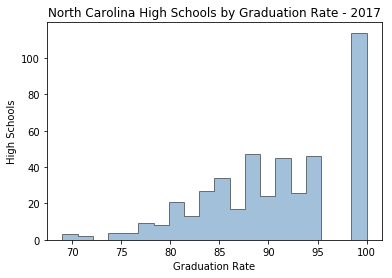

In [68]:
# Histogram of all 4-year graduation rates
x = schooldata17['4-Year Cohort Graduation Rate Score']

plt.xlabel('Graduation Rate')
plt.ylabel('High Schools')
plt.title("North Carolina High Schools by Graduation Rate - 2017")
plt.hist(x, bins=20, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='black');
plt.show()

### Race

In [34]:
# Get statistics on variables that relate to race
racevars = schooldata17[['MinorityPct','BlackPct','HispanicPct','PacificIslandPct','TwoOrMorePct']]
racevars.describe()

,MinorityPct,BlackPct,HispanicPct,PacificIslandPct,TwoOrMorePct
count,457.000000,457.000000,457.000000,457.000000,457.000000
mean,0.463859,0.246658,0.143860,0.001193,0.034976
std,0.247830,0.218668,0.101177,0.002265,0.018152
min,0.037234,0.000000,0.000000,0.000000,0.000000
25%,0.259082,0.071871,0.071429,0.000000,0.023085
50%,0.420428,0.196401,0.118622,0.000000,0.032008
75%,0.657143,0.378235,0.189003,0.001503,0.044419
max,0.993377,0.953368,0.572455,0.015326,0.122605


With a minority range of 95.61% (between 3.72% and 99.34%), there seems to be an extreme difference in the racial profiles of schools. This is intriguing and worth investigating factors that contribute to schools with high minority percents and the possible re-segregation of schools.

### Expenses

In [15]:
# Get statistics on variables that relate to expenses
expensevars = schooldata17[['lea_total_expense_num','lea_salary_expense_pct','lea_services_expense_pct','lea_supplies_expense_pct',
                                        'lea_instruct_equip_exp_pct','lea_federal_perpupil_num','lea_local_perpupil_num','lea_state_perpupil_num']]
expensevars.describe()

,lea_total_expense_num,lea_salary_expense_pct,lea_services_expense_pct,lea_supplies_expense_pct,lea_instruct_equip_exp_pct,lea_federal_perpupil_num,lea_local_perpupil_num,lea_state_perpupil_num
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,9444.377473,0.831927,0.080446,0.077851,0.009776,1101.954198,2094.740110,6247.683165
std,1210.170635,0.025024,0.016841,0.014311,0.006859,325.396650,736.813743,910.947102
min,8150.840000,0.761000,0.052000,0.028000,0.001000,518.190000,848.850000,5342.870000
25%,8639.200000,0.816000,0.069000,0.069000,0.006000,906.580000,1654.160000,5685.100000
50%,9148.790000,0.831000,0.079000,0.079000,0.009000,1069.730000,1933.510000,5963.330000
75%,9766.770000,0.852000,0.087000,0.091000,0.012000,1221.270000,2412.730000,6494.750000
max,17718.540000,0.878000,0.148000,0.117000,0.045000,2670.310000,6150.800000,12794.690000


The state expense per pupil is significantly higher than the local value on all metrics, which is even higher than the federal value. It could be interesting to investigate the reasoning behind this spending decision, and whether or not it is significantly beneficial to student learning and success.

### Testing

In [16]:
# Get statistics on variables that relate to testing
testingvars = schooldata17[['ACT Score','SPG Score','EVAAS Growth Score','NC Math 1 Score','English II Score','Biology Score',
                                        'ACT WorkKeys Score','Passing NC Math 3','sat_avg_score_num',
                                        'lea_sat_avg_score_num','sat_participation_pct','lea_sat_participation_pct']]
testingvars.describe()

,ACT Score,SPG Score,EVAAS Growth Score,NC Math 1 Score,English II Score,Biology Score,ACT WorkKeys Score,Passing NC Math 3,sat_avg_score_num,lea_sat_avg_score_num,sat_participation_pct,lea_sat_participation_pct
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.00000
mean,60.358242,72.641758,75.751429,57.630769,61.810989,57.386813,62.173626,98.885714,974.635165,1052.334066,0.389468,0.40793
std,20.856263,12.860879,17.286478,22.499142,20.541017,21.349098,29.903858,3.016861,287.787525,77.576837,0.190176,0.12191
min,12.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.00000
25%,47.000000,63.000000,64.400000,43.000000,48.000000,43.000000,57.000000,100.000000,984.000000,1024.000000,0.285500,0.32500
50%,60.000000,72.000000,79.800000,55.000000,60.000000,58.000000,72.000000,100.000000,1049.000000,1061.000000,0.391000,0.40400
75%,73.000000,82.000000,87.700000,74.000000,75.000000,72.000000,81.000000,100.000000,1102.500000,1095.000000,0.509500,0.49600
max,100.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1404.000000,1231.000000,0.931000,0.79000


It would be interesting to investigate whether test scores significantly impact graduation rates. Something interesting to note here is that the SAT participation seems fairly low, with a mean of 38.9% at the school level and 40.8% at the district level. This could be due to the fact that these numbers only count High School Seniors, while many students take this test as a Junior. North Carolina also only requires students to take the ACT, so this may also explain why the percentage is low for the optional SAT.

### Specialized Classes

In [17]:
# Get statistics on variables that relate to specialized classes
classvars = schooldata17[['ap_participation_pct','lea_ap_participation_pct','ap_pct_3_or_above','lea_ap_pct_3_or_above',
                                      'total_specialized_courses','cte_courses','lea_cte_courses','univ_college_courses','lea_univ_college_courses']]
classvars.describe()

,ap_participation_pct,lea_ap_participation_pct,ap_pct_3_or_above,lea_ap_pct_3_or_above,total_specialized_courses,cte_courses,lea_cte_courses,univ_college_courses,lea_univ_college_courses
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.108945,0.125363,0.323560,0.411297,0.971754,0.648204,0.698819,0.225514,0.120561
std,0.109260,0.082252,0.251757,0.161187,0.128906,0.232000,0.112950,0.326584,0.095463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.070000,0.080000,0.320000,0.997393,0.602526,0.655961,0.023193,0.051443
50%,0.100000,0.120000,0.330000,0.420000,1.000000,0.719570,0.714359,0.075758,0.108498
75%,0.160000,0.190000,0.510000,0.530000,1.000000,0.794933,0.758595,0.212536,0.168845
max,0.600000,0.440000,0.950000,0.790000,1.000000,1.000000,0.899340,1.000000,0.608187


Overall, the participation in specialized courses seems fairly low. It could be worth investigating whether high specialized course involvement has a relationship with graduation rate, especially for schools that have a high minority percentage.

### Teachers and Staff

In [18]:
# Get statistics on variables that relate to teachers
teachervars = schooldata17[['flicensed_teach_pct','lea_flicensed_teach_pct','_1yr_tchr_trnovr_pct','lea_1yr_tchr_trnovr_pct','tchyrs_0thru3_pct','lea_tchyrs_0thru3_pct',
                                        'tchyrs_4thru10_pct','lea_tchyrs_4thru10_pct','tchyrs_11plus_pct','lea_tchyrs_11plus_pct',
                                        'nbpts_num','lea_nbpts_num','advance_dgr_pct','lea_advance_dgr_pct',
                                        'lateral_teach_pct','lea_emer_prov_teach_pct','0-3 Years_LEA_Exp_Pct_Prin','4-10 Years_LEA_Exp_Pct_Prin',
                                        '10+ Years_LEA_Exp_Pct_Prin']]
teachervars.describe()

,flicensed_teach_pct,lea_flicensed_teach_pct,_1yr_tchr_trnovr_pct,lea_1yr_tchr_trnovr_pct,tchyrs_0thru3_pct,lea_tchyrs_0thru3_pct,tchyrs_4thru10_pct,lea_tchyrs_4thru10_pct,tchyrs_11plus_pct,lea_tchyrs_11plus_pct,nbpts_num,lea_nbpts_num,advance_dgr_pct,lea_advance_dgr_pct,lateral_teach_pct,lea_emer_prov_teach_pct,0-3 Years_LEA_Exp_Pct_Prin,4-10 Years_LEA_Exp_Pct_Prin,10+ Years_LEA_Exp_Pct_Prin
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.896996,0.893710,0.141481,0.147815,0.207097,0.209457,0.239727,0.237365,0.550989,0.553048,7.035165,6.894505,0.261264,0.247316,0.093912,0.002393,0.442103,0.406154,0.151741
std,0.101450,0.064289,0.085439,0.052880,0.114848,0.065905,0.094235,0.042872,0.127315,0.067923,6.545577,4.216847,0.113986,0.057649,0.087415,0.007108,0.152245,0.130438,0.092676
min,0.000000,0.577000,0.000000,0.000000,0.000000,0.059000,0.000000,0.056000,0.000000,0.356000,0.000000,0.000000,0.000000,0.077000,0.000000,0.000000,0.143000,0.000000,0.000000
25%,0.862500,0.869000,0.091000,0.122000,0.137000,0.170000,0.190000,0.215000,0.482000,0.505500,2.000000,4.000000,0.188000,0.212000,0.034000,0.000000,0.333000,0.321000,0.087000
50%,0.922000,0.902000,0.139000,0.143000,0.196000,0.196000,0.234000,0.242000,0.560000,0.556000,5.000000,6.000000,0.248000,0.250000,0.076000,0.000000,0.385000,0.440000,0.153000
75%,0.960500,0.939000,0.185500,0.163000,0.258500,0.229000,0.286000,0.267000,0.633000,0.591000,10.000000,9.000000,0.310500,0.279000,0.130000,0.003000,0.500000,0.500000,0.222000
max,1.000000,1.000000,0.667000,0.365000,0.833000,0.533000,0.625000,0.400000,1.000000,0.781000,38.000000,22.000000,0.750000,0.500000,0.698000,0.130000,1.000000,0.857000,0.667000


A majority of teachers are fully licensed both at the school and the district level. The one-year teacher turnover rate at the school level has a much higher range (66.7%) than at the district level (36.5%), which could be a value to look into for individual schools.

### Discipline

In [19]:
# Get statistics on variables that relate to discipline
classvars = schooldata17[['crime_per_c_num','lea_crime_per_c_num','st_crime_per_c_num','short_susp_per_c_num',
                                      'st_short_susp_per_c_num','lea_short_susp_per_c_num','long_susp_per_c_num',
                                      'lea_long_susp_per_c_num','expelled_per_c_num','lea_expelled_per_c_num']]
classvars.describe()

,crime_per_c_num,lea_crime_per_c_num,st_crime_per_c_num,short_susp_per_c_num,st_short_susp_per_c_num,lea_short_susp_per_c_num,long_susp_per_c_num,lea_long_susp_per_c_num,expelled_per_c_num,lea_expelled_per_c_num
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,1.004637,1.176835,1.213165,16.013473,18.279055,18.986176,0.100176,0.115055,0.001516,0.002044
std,0.876234,0.547073,0.108138,16.925645,4.053900,13.189847,0.286522,0.206331,0.013815,0.006469
min,0.000000,0.000000,0.530000,0.000000,9.090000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.870000,1.210000,4.605000,17.750000,10.340000,0.000000,0.000000,0.000000,0.000000
50%,0.880000,1.120000,1.210000,11.360000,17.750000,15.950000,0.000000,0.040000,0.000000,0.000000
75%,1.440000,1.460000,1.210000,22.255000,17.750000,23.180000,0.060000,0.110000,0.000000,0.000000
max,5.090000,3.710000,1.670000,125.310000,42.140000,109.090000,3.050000,1.140000,0.220000,0.050000


Extreme disciplinary amounts (crime, long-term suspensions, and expulsion) per 100 students all remain fairly low.

___

# Visualize Attributes

<a id='Visualize Attributes'></a>

We will now visualize and interpret interesting attributes from the dataset.

### Funding Sources

In [31]:
#Get high school district level funding data
path="https://github.com/jheinen001/MyRepository/raw/master/schoolData17Funding.csv"
schooldata17Funding=pd.read_csv(path, low_memory=False)

#Check loaded data
schooldata17Funding.info(verbose=False)
print('************************************************************')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Columns: 399 entries, unit_code to Unnamed: 398
dtypes: float64(398), int64(1)
memory usage: 1.4 MB
************************************************************


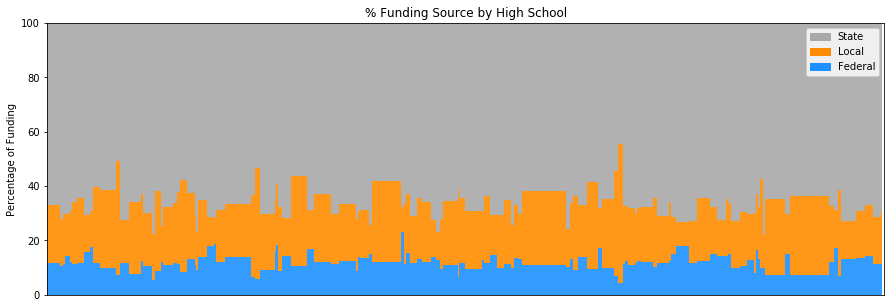

In [98]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Help for 100% stacked bar chart came from URL: 
#https://chrisalbon.com/python/data_visualization/matplotlib_percentage_stacked_bar_plot/
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(15,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(schooldata17Funding['Federal']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k for i,j,k in zip(schooldata17Funding['Federal'], schooldata17Funding['Local'], schooldata17Funding['State'])]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(schooldata17Funding['Federal'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(schooldata17Funding['Local'], totals)]

# Create the percentage of the total score the post_score value for each participant was
post_rel = [i / j * 100 for  i,j in zip(schooldata17Funding['State'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       pre_rel,             # using pre_rel data 
       label='Federal',     # labeled 
       alpha=0.9,           # with alpha
       color='#1E90FF',     # with color
       width=bar_width,     # with bar width
       #edgecolor='#1E90FF' # with border color
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       mid_rel,             # using mid_rel data
       bottom=pre_rel,      # with pre_rel
       label='Local',       # labeled  
       alpha=0.9,           # with alpha
       color='#FF8C00',     # with color
       width=bar_width,     # with bar width
       #edgecolor='#FF8C00' # with border color
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       post_rel,            # using post_rel data
       bottom=[i+j for i,j in zip(pre_rel, mid_rel)],  # with pre_rel and mid_rel on bottom
       label='State',       # labeled
       alpha=0.9,           # with alpha
       color='#A9A9A9',     # with color
       width=bar_width,     # with bar width
       #edgecolor='#A9A9A9' # with border color
       )

# Set the ticks to be first names
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_ylabel("Percentage of Funding")
ax.set_xlabel("")
plt.title("% Funding Source by High School")
# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(0, 100)

# Set Legend
federal_patch = mpatches.Patch(color='#1E90FF', label='Federal')
local_patch = mpatches.Patch(color='#FF8C00', label='Local')
state_patch = mpatches.Patch(color='#A9A9A9', label='State')

# Add Legend to Plot
plt.legend(handles=[state_patch, local_patch, federal_patch] )

# rotate axis labels
#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

Although the dataset does not include funding information at the school level, funding still seems like an important attribute contributing to student success to explore, even at the District (LEA) level.  The variables explored here are:

* lea_federal_perpupil_num  
* lea_local_perpupil_num  
* lea_state_perpupil_num  

The 100% stacked bar chart above represents each school, sorted by district, showing the percentage of each funding source, federal, state, and local.  The chart shows that although the majority of funding for almost all schools comes from the state, there is enough variation between the schools that warrants further investigation on these variables and they could be important in determining graduation rate.

Normally a stacked bar chart would not be the best option to represent over 400 rows of data.  However, in this case, this graph quickly shows that there are spikes and dips in each of the types of funding.  Had the colors been mostly flat, the data may not have been interesting to explore further.

### Teacher Experience

In [39]:
#Get high school teacher and principal experience data
path="https://github.com/jheinen001/MyRepository/raw/master/schooldata17tchprn.csv"
schooldata17tchprn=pd.read_csv(path, low_memory=False)

#Check loaded data
schooldata17tchprn.info(verbose=False)
print('************************************************************')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Columns: 8 entries, unit_code to Principal Experience 11+ Years
dtypes: float64(7), int64(1)
memory usage: 29.3 KB
************************************************************


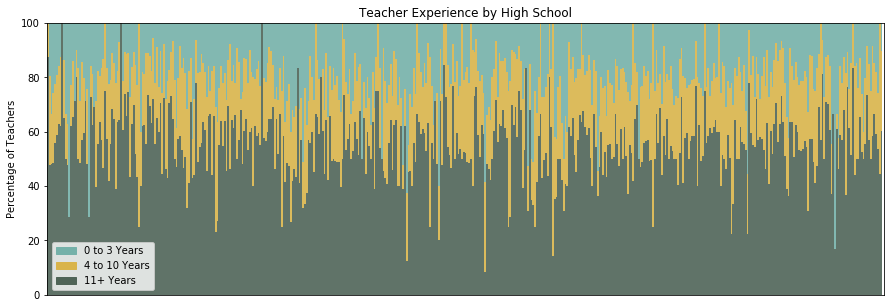

In [99]:
# Help for 100% stacked bar chart came from URL: 
#https://chrisalbon.com/python/data_visualization/matplotlib_percentage_stacked_bar_plot/
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(15,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(schooldata17tchprn['Teacher Experience 11+ Years']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k for i,j,k in zip(schooldata17tchprn['Teacher Experience 11+ Years'], schooldata17tchprn['Teacher Experience 4 to 10 Years'], schooldata17tchprn['Teacher Experience 0 to 3 Years'])]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(schooldata17tchprn['Teacher Experience 11+ Years'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(schooldata17tchprn['Teacher Experience 4 to 10 Years'], totals)]

# Create the percentage of the total score the post_score value for each participant was
post_rel = [i / j * 100 for  i,j in zip(schooldata17tchprn['Teacher Experience 0 to 3 Years'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       pre_rel,             # using pre_rel data
       label='11+ Years',   # labeled  
       alpha=0.9,           # with alpha
       color='#4F6457',     # with color
       width=bar_width,     # with bar width
       #edgecolor='#4F6457' # with border color
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       mid_rel,               # using mid_rel data
       bottom=pre_rel,        # with pre_rel
       label='4 to 10 Years', # labeled 
       alpha=0.9,             # with alpha
       color='#D9B44A',       # with color
       width=bar_width,       # with bar width
       #edgecolor='#D9B44A'   # with border color
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       post_rel,                                      # using post_rel data
       bottom=[i+j for i,j in zip(pre_rel, mid_rel)], # with pre_rel and mid_rel on bottom
       label='0 to 3 Years',                          # labeled            
       alpha=0.9,                                     # with alpha
       color='#75B1A9',                               # with color 
       width=bar_width,                               # with bar width
       #edgecolor='#75B1A9'                           # with border color
       )

# Set the ticks to be first names
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_ylabel("Percentage of Teachers")
ax.set_xlabel("")
plt.title("Teacher Experience by High School")
# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(0, 100)

# Set Legend
high_patch = mpatches.Patch(color='#4F6457', label='11+ Years')
medium_patch = mpatches.Patch(color='#D9B44A', label='4 to 10 Years')
low_patch = mpatches.Patch(color='#75B1A9', label='0 to 3 Years')

# Add Legend to Plot
plt.legend(handles=[low_patch, medium_patch, high_patch] )

# rotate axis labels
#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

Three interesting variables representing average teacher experience at the school level are explored in the chart above, these variables are:

* tchyrs_0thru3_pct  
* tchyrs_4thru10_pct   
* tchyrs_4thru10_pct  

The 100% stacked bar chart above represents each school, sorted by district, showing the percentage of teacher experience by category (0 to 3 years, 4 to 10 years, and 11 plus years).  The chart overall shows a wide variation of experience for teachers across North Carolina high schools.  It was interesting to find that the average experience level of 11 plus years occurred in 71% of the schools.  However, this picture can be likened to a chart of sound waves and the variation shown can be seen as a great deal of noise.  Since this graph shows a lot of “noise”, this set of variables is worth exploring further. 

After trying other graphs to represent teacher experience, the stacked bar chart showed that while there was a majority of schools having teachers with average experience greater than 11 years, there is also enough variation between the schools in average teacher experience.  These variables may impact graduation rate. 

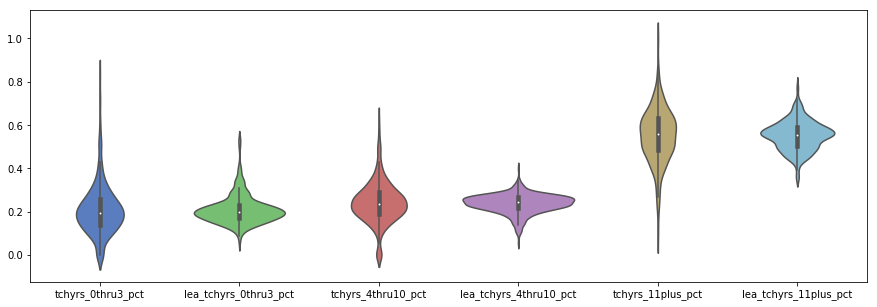

In [86]:
teachers = schooldata17[['tchyrs_0thru3_pct','lea_tchyrs_0thru3_pct','tchyrs_4thru10_pct','lea_tchyrs_4thru10_pct',
                         'tchyrs_11plus_pct','lea_tchyrs_11plus_pct']]
principals = schooldata17[['0-3 Years_LEA_Exp_Pct_Prin','4-10 Years_LEA_Exp_Pct_Prin','10+ Years_LEA_Exp_Pct_Prin']]

# Percent of teachers with different years of experience at the school and district level
ax = plt.figure(figsize=(15, 5))
ax = sns.violinplot(data=teachers, palette="muted")

In addition to the stacked bar chart above, we decided to add a violin plot of teacher experience to compare the various years of experience at the school and district level. The violin plot allows us to quickly see the distribution of the data with the kernel density estimation. The percentage of teachers with various years of experience has a much smaller distribution range at the district level than at the school level. At the school level, there is a high percentage of teachers that have more than 10 years of experience.

### Principal Experience

In [41]:
#Get high school teacher and principal experience data
path="https://github.com/jheinen001/MyRepository/raw/master/schooldata17tchprn.csv"
schooldata17tchprn=pd.read_csv(path, low_memory=False)

#Check loaded data
schooldata17tchprn.info(verbose=False)
print('************************************************************')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Columns: 8 entries, unit_code to Principal Experience 11+ Years
dtypes: float64(7), int64(1)
memory usage: 29.3 KB
************************************************************


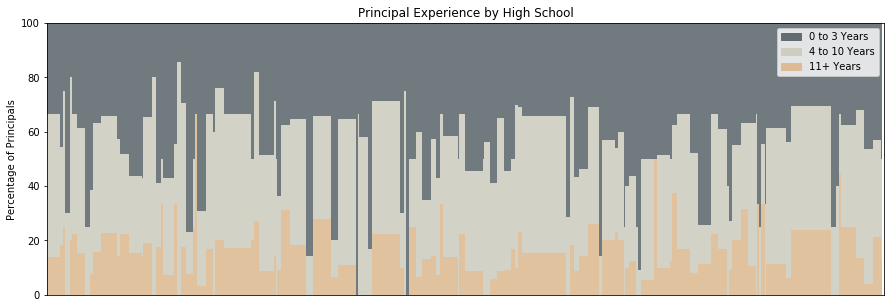

In [100]:
# Help for 100% stacked bar chart came from URL: 
#https://chrisalbon.com/python/data_visualization/matplotlib_percentage_stacked_bar_plot/
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(15,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(schooldata17tchprn['Principal Experience 11+ Years']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k for i,j,k in zip(schooldata17tchprn['Principal Experience 11+ Years'], schooldata17tchprn['Principal Experience 4 to 10 Years'], schooldata17tchprn['Principal Experience 0 to 3 Years'])]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(schooldata17tchprn['Principal Experience 11+ Years'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(schooldata17tchprn['Principal Experience 4 to 10 Years'], totals)]

# Create the percentage of the total score the post_score value for each participant was
post_rel = [i / j * 100 for  i,j in zip(schooldata17tchprn['Principal Experience 0 to 3 Years'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       pre_rel,              # using pre_rel data
       label='11+ Years',    # labeled 
       alpha=0.9,            # with alpha
       color='#DDBC95',      # with color
       width=bar_width,      # with bar width
       #edgecolor='#DDBC95'  #with border color
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       mid_rel,               # using mid_rel data 
       bottom=pre_rel,        # with pre_rel
       label='4 to 10 Years', # labeled
       alpha=0.9,             # with alpha
       color='#CDCDC0',       # with color
       width=bar_width,       # with bar width
       #edgecolor='#CDCDC0'   # with border color
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       post_rel,                                      # using post_rel data
       bottom=[i+j for i,j in zip(pre_rel, mid_rel)], # with pre_rel and mid_rel on bottom
       label='0 to 3 Years',                          # labeled 
       alpha=0.9,                                     # with alpha
       color='#626D71',                               # with color
       width=bar_width,                               # with bar width
       #edgecolor='#626D71'                           # with border color
       )

# Set the ticks to be first names
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_ylabel("Percentage of Principals")
ax.set_xlabel("")
plt.title("Principal Experience by High School")
# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(0, 100)

# Set Legend
high_patch = mpatches.Patch(color='#DDBC95', label='11+ Years')
medium_patch = mpatches.Patch(color='#CDCDC0', label='4 to 10 Years')
low_patch = mpatches.Patch(color='#626D71', label='0 to 3 Years')

# Add Legend to Plot
plt.legend(handles=[low_patch, medium_patch, high_patch] )

# rotate axis labels
#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

Although the dataset does not include principal experience at the school level, principal experience still seems like an important attribute contributing to student success to explore, even at the District (LEA) level.  The variables explored here are:

* 0-3 Years_LEA_Exp_Pct_Prin   
* 4-10 Years_LEA_Exp_Pct_Prin   
* 10+ Years_LEA_Exp_Pct_Prin  

The 100% stacked bar chart above represents each school, sorted by district, showing the percentage of principal experience by category (0 to 3 years, 4 to 10 years, and 11 plus years).  The chart overall shows a wide variation of experience for principals across North Carolina high schools.  It was interesting to find that the experience level of 11 plus years to occur less than expected.  The chart shows that the vast majority of districts average less than 10 years experienced principals.  30% of the districts have a majority of schools with Principals with experience of 3 or less years.  

After trying other graphs to represent principal experience, the stacked bar chart clearly showed the delineation between the 3 experience categories for principals.  After reviewing the graph, it is believed that these variables warrant further exploration and how they may impact graduation rate.

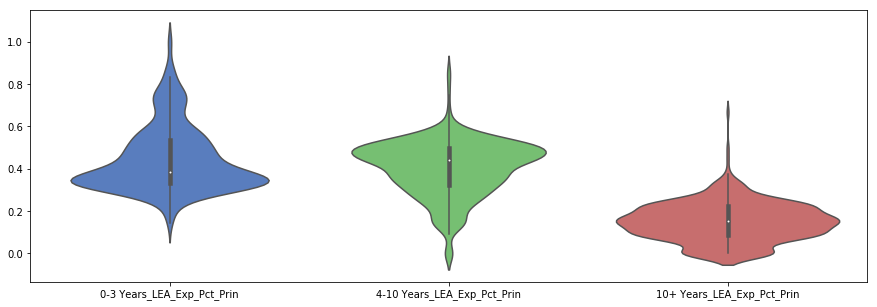

In [87]:
# Percent of principals with different years of experience at the district level
ax = plt.figure(figsize=(15, 5))
ax = sns.violinplot(data=principals, palette="muted")

The violin plot shows the kernel density estimation along with the distribution of principal experience at the district level. The majority of principals have between 4-10 years of experience. It is interesting to note that less principals have more than 10 years of experience than the other groups. This could be because many principals begin as teachers, so they might spend a majority of their career teacher before going into a leadership position, thus having less years of principal experience.

### Race

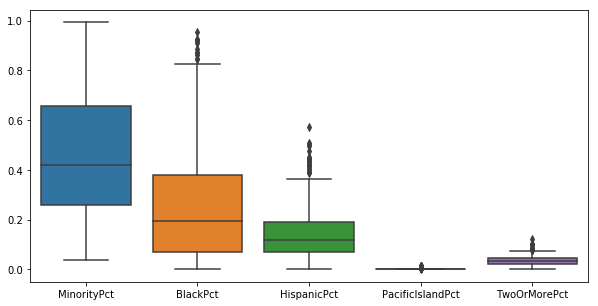

In [69]:
# Boxplot of different race percentage distributions
ax = plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=racevars)

The boxplots above show the distributions of the different races in North Carolina public high schools. The most common race is Black, followed by Hispanic.

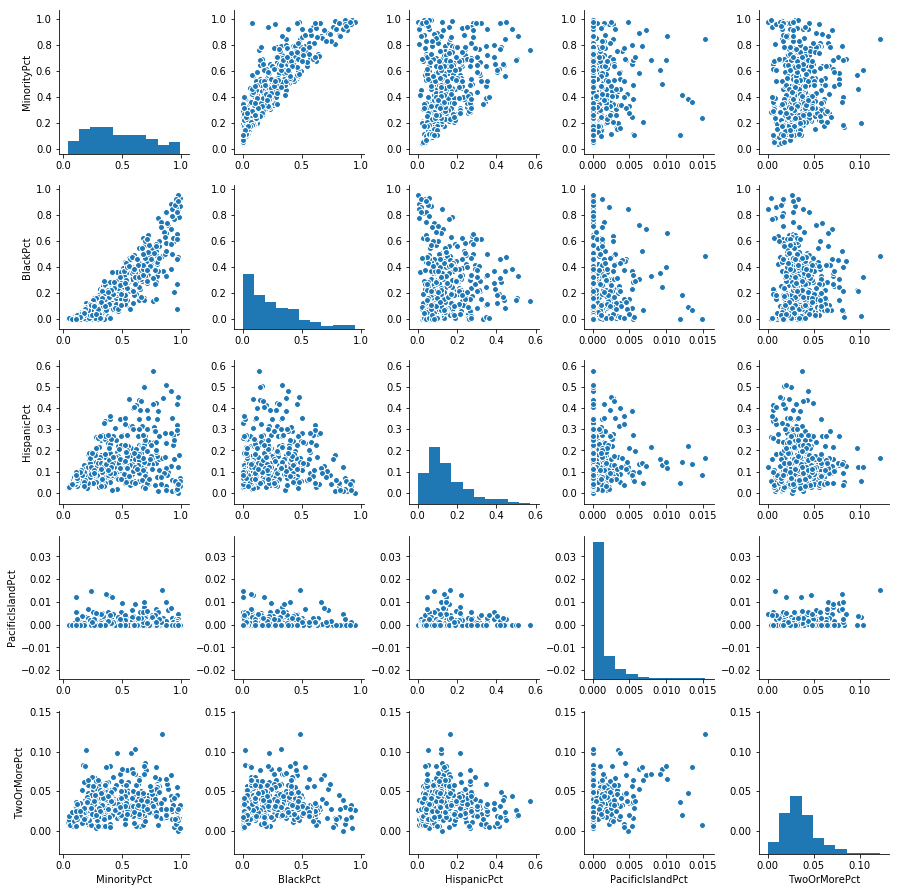

In [70]:
# Racial scatter matrix
sns.pairplot(racevars, size=2.5)

Above, you can see the scatterplot matrix of various races as they relate with each other. It is interesting to note that there may be a slightly negative correlation between various races with eachother. For example, there seems to be a negative correlation between Hispanic percent and Black percent, which could be interesting to look into as school racial compositions compared to school locations.

___

# Explore Joint Attributes

<a id='Explore Joint Attributes'></a>

In [74]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import matplotlib.patches as mpatches
%matplotlib inline

In [73]:
#creating deciles for variables of interest
#Note!! 1=smallest values 10=largest values
schooldata17['sat_decile']=pd.qcut(schooldata17['sat_avg_score_num'],10,labels=False)+1
schooldata17['black_decile']=pd.qcut(schooldata17['BlackPct'],10,labels=False)+1
schooldata17['student_num_decile']=pd.qcut(schooldata17['student_num'],10,labels=False)+1
schooldata17['attend_percentile']=pd.qcut(schooldata17['avg_daily_attend_pct'],10,labels=False)+1
schooldata17['MinorityPct_Decile']=pd.qcut(schooldata17['MinorityPct'],10,labels=False)+1
schooldata17['sat_avg_score_num_decile']=pd.qcut(schooldata17['sat_avg_score_num'],10,labels=False)+1

### Number of Students vs. Expenses

array([[ 1.        ,  0.27859901],
       [ 0.27859901,  1.        ]])

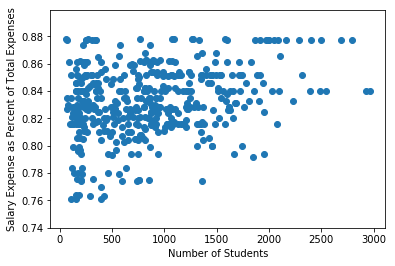

In [74]:
#scatter plot and correlation of student number at a school and salary expense as a percent of total expenses
plot.scatter(schooldata17['student_num'],schooldata17['lea_salary_expense_pct']) 
plot.xlabel('Number of Students')
plot.ylabel('Salary Expense as Percent of Total Expenses')

np.corrcoef(schooldata17['student_num'],schooldata17['lea_salary_expense_pct'])

As the number of students at a school increases so does the percent of total expenses the school dedicates to salaries.

In [75]:
#correlation between school size and supplies and services expenses as a percentage of total expenses
print(np.corrcoef(schooldata17['student_num'],schooldata17['lea_supplies_expense_pct']))

print(np.corrcoef(schooldata17['student_num'],schooldata17['lea_services_expense_pct']))

[[ 1.         -0.25597925]
 [-0.25597925  1.        ]]
[[ 1.         -0.15754755]
 [-0.15754755  1.        ]]


Both supplies and services expenses become a smaller percentage of total expenses as school size increases.

### Number of Students vs. Test Scores

array([[ 1.        , -0.14345226],
       [-0.14345226,  1.        ]])

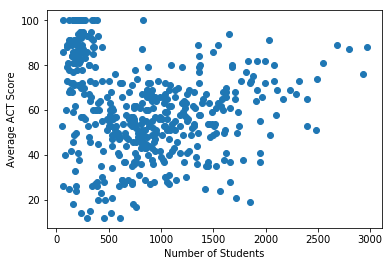

In [76]:
#scatter plot and correlation of number of students at a school and the average ACT score
plot.scatter(schooldata17['student_num'],schooldata17['ACT Score']) 
plot.xlabel('Number of Students')
plot.ylabel('Average ACT Score')

np.corrcoef(schooldata17['student_num'],schooldata17['ACT Score'])

The bigger the school population the worse students score on the ACT.

array([[ 1.        ,  0.36274001],
       [ 0.36274001,  1.        ]])

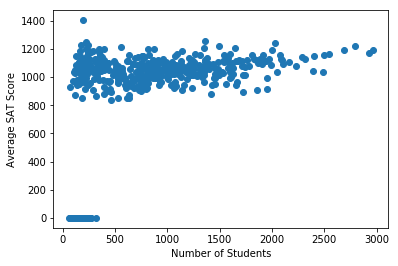

In [77]:
#scatter plot and correlation of number of students at a school and the average SAT score
plot.scatter(schooldata17['student_num'],schooldata17['sat_avg_score_num'])
plot.xlabel('Number of Students')
plot.ylabel('Average SAT Score')

np.corrcoef(schooldata17['student_num'],schooldata17['sat_avg_score_num'])

The bigger the school population the better students score on the SAT.

array([[ 1.        ,  0.18193691],
       [ 0.18193691,  1.        ]])

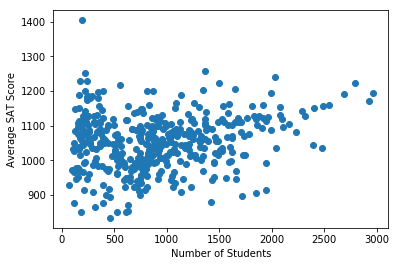

In [78]:
#scatter plot and correlation of number of students at a school and the average SAT score
sampled=schooldata17[schooldata17['sat_avg_score_num']>0]
plot.scatter(sampled['student_num'],sampled['sat_avg_score_num'])
plot.xlabel('Number of Students')
plot.ylabel('Average SAT Score')

np.corrcoef(sampled['student_num'],sampled['sat_avg_score_num'])

Removing the schools with an average SAT value of zero still yielded a positive correlation.

### Number of Students vs. Per Pupil Funding

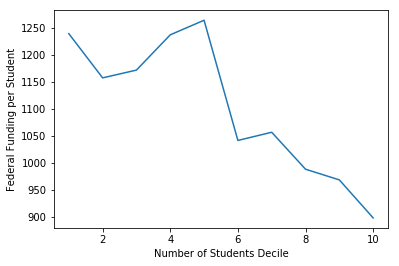

In [79]:
#graphing the federal per pupil number across the number of students at a school by decile
graph=schooldata17.groupby('student_num_decile',as_index=False).agg({'lea_federal_perpupil_num':'mean'})
plot.xlabel('Number of Students Decile')
plot.ylabel('Federal Funding per Student')

plot.plot(graph['student_num_decile'],graph['lea_federal_perpupil_num'])

As the number of students increase in a school the federal funding per student decreases.

### Number of Students vs. Minority Percent

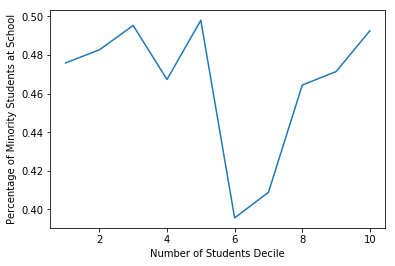

In [80]:
#graphing the minority percentage of a school across the number of students at a school by decile
graph=schooldata17.groupby('student_num_decile',as_index=False).agg({'MinorityPct':'mean'})
plot.xlabel('Number of Students Decile')
plot.ylabel('Percentage of Minority Students at School')

plot.plot(graph['student_num_decile'],graph['MinorityPct'])

This graph shows that for every decile besides six and seven the minority percentage is relatively constant across all school sizes.

### Minority Percent vs. Federal Funding

Text(0,0.5,'Federal Funding per Student')

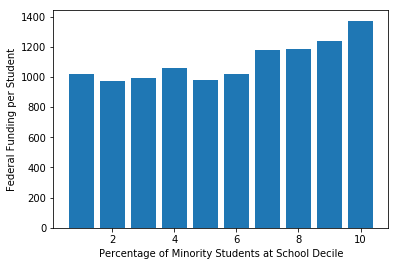

In [81]:
#graphing the federal funding per student across the minority percentage of a school by decile
graph=schooldata17.groupby('MinorityPct_Decile',as_index=False).agg({'lea_federal_perpupil_num':'mean'})
plot.bar(graph['MinorityPct_Decile'],graph['lea_federal_perpupil_num'])
plot.xlabel('Percentage of Minority Students at School Decile')
plot.ylabel('Federal Funding per Student')

As the minority percentage at a school increases the federal funding per pupil as increases.

### SAT Score vs. Student Percentage

Text(0,0.5,'Percentage of Students at School')

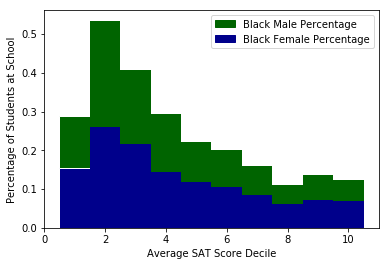

In [82]:
#graph of black male and female percentages across average SAT scores by deciles 
#female black percentage is blue
#male black percentage is green
females=schooldata17.groupby('sat_avg_score_num_decile',as_index=False).agg({'BlackFemalePct':'mean'})
males=schooldata17.groupby('sat_avg_score_num_decile',as_index=False).agg({'BlackMalePct':'mean'})

plot.bar(males['sat_avg_score_num_decile'],males['BlackMalePct']+females['BlackFemalePct']
         ,color='darkgreen',edgecolor='white',width=1)


plot.bar(females['sat_avg_score_num_decile'],females['BlackFemalePct']
         ,color='darkblue',edgecolor='white',width=1,)

green=mpatches.Patch(color='darkgreen',label='Black Male Percentage')
blue=mpatches.Patch(color='darkblue',label='Black Female Percentage')
plot.legend(handles=[green,blue])
plot.xlabel('Average SAT Score Decile')
plot.ylabel('Percentage of Students at School')

Overall as the average SAT score increases the percentage of black students decreases. It looks as if the percentage of black male and female students remains the same across high and low SAT performing schools.

Text(0,0.5,'Percentage of Black Students at School')

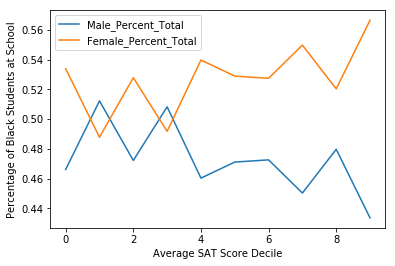

In [83]:
both=pd.concat([females,males],axis=1)
both['total']=both['BlackFemalePct']+both['BlackMalePct']
both['Male_Percent_Total']=both['BlackMalePct']/both['total']
both['Female_Percent_Total']=both['BlackFemalePct']/both['total']

plot.plot(both['Male_Percent_Total'])
plot.plot(both['Female_Percent_Total'])
plot.legend()
plot.xlabel('Average SAT Score Decile')
plot.ylabel('Percentage of Black Students at School')

The first few figures in this section all look at the relationship between school population and different variables. The first scatter plot shows a positive correlation between the school size and the percent of total expenses spent on salaries. This relationship makes sense because the more students a school has the more teachers it needs, thus more of the school’s budget goes to salaries for its employees mainly teachers. However, this ultimately hurts the schools because they have less money for other things as shown by the negative correlation between school size and supplies and services expenses as a percentage of total expenses. These relationships show that the bigger a school gets the less money it spends of supplies for classrooms and students. Ideally all three expenses categories would be constant across all different sizes of schools because one would hope that as the school size increased the budget would increase on a per student basis. This is not what is shown here though by larger schools having to spend more of their budget on teachers and areas such as classroom supplies are negatively affected because of this. 

While the SAT and ACT are different tests one would think that if a student does well one on they generally should do well on the other. Looking at the average ACT and SAT scores versus school size we see different relationships. ACT scores have a negative correlation with school size while SAT scores have a positive correlation. There are a few schools that have an average SAT score of zero but even with those schools removed the relationship is still positive. One explanation for this is that the SAT has been around for a lot longer than the ACT. As a result the bigger schools might be focused more on the SAT because for most people that is the test that comes to mind when they think about college admission testing. Since the smaller schools have less students they might be able to specialize a little more than the bigger schools and focus on both tests for their student body. This would explain why the smaller schools perform better on the ACT.

The first of the two line graphs shows the mean federal funding amount per student by school size decile. This line is downward sloping which is not an encouraging result. Since the funding amount is on a per student basis one would hope this would be a flat line because if a school has more students they would receive more funding. That is not what is shown by this graph. The downward sloping line means that schools with a larger population generally receive less funding per student than smaller schools. This supports the notion that smaller schools are better for a student’s education because among other things they receive more funding per student than larger schools, at least in North Carolina. The second line graph again has the student population grouped into deciles but this time has the mean minority percentage of the schools in the decile on the y-axis. Besides deciles six and seven this line is relatively flat. Larger populated areas, cities, tend to have a higher percentage of minorities than suburb towns. Following this logic one might think that the schools in these largely populated areas would be larger and thus a larger percentage of the school’s population would be minorities. This graph disproves this notion by being flat which means that both small and large schools have a similar percentage of minorities in their student body.

Continuing to look into the relationship between variables and minority percentage of a school the next figure shows the mean federal funding amount per student across the minority percentage of a school grouped by deciles. These bars have an upward trend to them which means that generally the higher minority percentage in a school the more federal funding they receive per student. This relationship makes sense because impoverished areas tend to have a larger percentage of minorities living in them. The schools in these areas are the ones that should be receiving federal funding and this graph shows that they tend to be receiving it. This is a positive sign that areas that need funding are actually receiving it. The last figure is a bar chart that shows the percent of black male and female students across the deciles of schools by average SAT score. Overall the percentage of black students tends to decreases as the average SAT score of a school increases. The percentage of black male versus female students seems to remain the same across all the deciles. It does appear that toward the upper deciles the percentage of female black students seems to be taking up a larger proportion of the total black student percentage. This can also be seen in the line graph below the bar chart, where although small, one can see that the percentage of female black students becomes a larger proportion of the total black student percentage as the SAT scores for a school increase.

___

# Explore Attributes and Class

<a id='Explore Attributes and Class'></a>

### Number of Students vs. Graduation Rate

Text(0,0.5,'Four Year Graduation Rate')

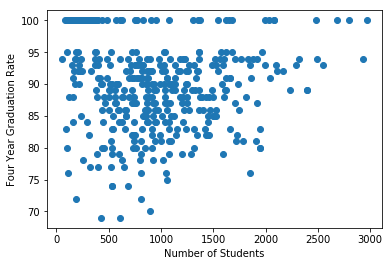

In [75]:
#correlation and scatterplot of number of students and 4 year graduation rate
plot.scatter(schooldata17['student_num'],schooldata17['4-Year Cohort Graduation Rate Score']) 

np.corrcoef(schooldata17['student_num'],schooldata17['4-Year Cohort Graduation Rate Score'])
plot.xlabel('Number of Students')
plot.ylabel('Four Year Graduation Rate')

The negative correlation means that as the student population increases the graduation rate decreases. This supports the claim by many that small class sizes result in better education for the students.

### Attendance vs. Graduation Rate

Text(0,0.5,'Four Year Graduation Rate')

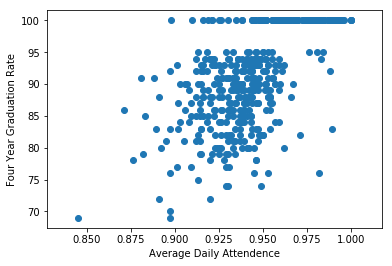

In [76]:
#correlation and scatter plot between average daily attendence and 4 year graduation rate
plot.scatter(schooldata17['avg_daily_attend_pct'],schooldata17['4-Year Cohort Graduation Rate Score']) 

np.corrcoef(schooldata17['avg_daily_attend_pct'],schooldata17['4-Year Cohort Graduation Rate Score'])
plot.xlabel('Average Daily Attendence')
plot.ylabel('Four Year Graduation Rate')

This relationship is not a surprise at all. The more students that go to class the more students that graduate. We will now visualize whether this trend is consistent in minority schools.

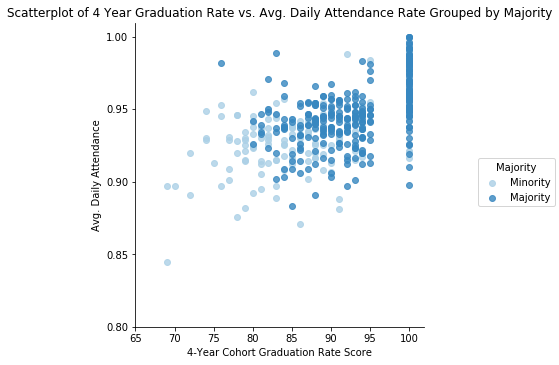

In [13]:
%matplotlib inline
sns.lmplot( x='4-Year Cohort Graduation Rate Score', y='avg_daily_attend_pct', data=schooldata17, fit_reg=False, hue = 'Majority',legend=True, palette="Blues")
_ = plt.title('Scatterplot of 4 Year Graduation Rate vs. Avg. Daily Attendance Rate Grouped by Majority')
_ = plt.xticks([65,70,75,80,85,90,95,100])
_ = plt.yticks([.80, .85, .90, .95, 1.00])
_ = plt.ylabel('Avg. Daily Attendance')

From the scatterplot above we can see that Avg. Daily Attendance is slightly correlated with Graduation Rate in 4 Years. The points are also grouped by majority in this plot, so we can also see that the schools with the lowest daily attendance also had the lowest graduation rate as well as being a majority minority high school. This tells us that there is some sort of correlation between the three, but it is unclear whether or not there is causation. 

### Expenses vs. Graduation Rate

Text(0,0.5,'Four Year Graduation Rate')

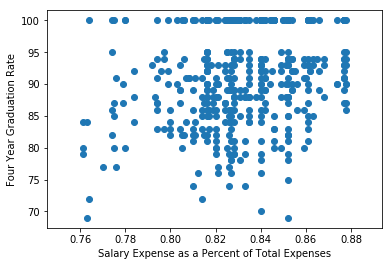

In [77]:
#correlation and scatter plot between salary expense and 4 year graduation rate
plot.scatter(schooldata17['lea_salary_expense_pct'],schooldata17['4-Year Cohort Graduation Rate Score']) 

np.corrcoef(schooldata17['lea_salary_expense_pct'],schooldata17['4-Year Cohort Graduation Rate Score'])
plot.xlabel('Salary Expense as a Percent of Total Expenses')
plot.ylabel('Four Year Graduation Rate')

A positive correlation makes sense here because if the school is paying its teachers more then they are most likely attracting better teachers than schools that are paying their teachers less. This results in the students learning better which results in a higher graduation rate.

Text(0,0.5,'Four Year Graduation Rate')

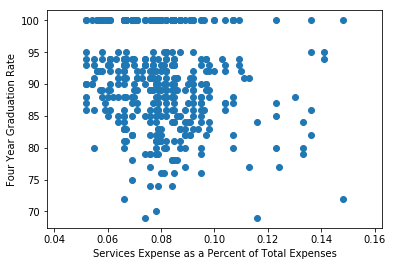

In [78]:
#correlation and scatter plot between services expense and 4 year graduation rate
plot.scatter(schooldata17['lea_services_expense_pct'],schooldata17['4-Year Cohort Graduation Rate Score']) 

np.corrcoef(schooldata17['lea_services_expense_pct'],schooldata17['4-Year Cohort Graduation Rate Score'])
plot.xlabel('Services Expense as a Percent of Total Expenses')
plot.ylabel('Four Year Graduation Rate')

This relationship makes sense since the variable is a percentage of total expense then if a school has a high service expense that means they are not spending that money in other places, such as teachers’ salaries.

Text(0,0.5,'Four Year Graduation Rate')

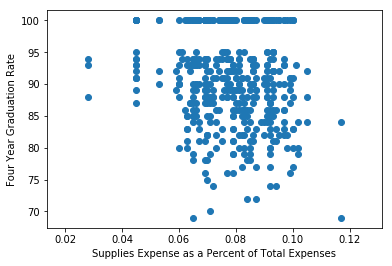

In [79]:
#correlation and scatter plot between supplies expense and 4 year graduation rate
plot.scatter(schooldata17[ 'lea_supplies_expense_pct'],schooldata17['4-Year Cohort Graduation Rate Score'])

np.corrcoef(schooldata17[ 'lea_supplies_expense_pct'],schooldata17['4-Year Cohort Graduation Rate Score'])
plot.xlabel('Supplies Expense as a Percent of Total Expenses')
plot.ylabel('Four Year Graduation Rate')

The same logic applies here as in the graph above, if the school is spending a higher percentage of funds on supplies it is taking away those funds form another area.

### Minority Percentage vs. Graduation Rate

Text(0,0.5,'Four Year Graduation Rate')

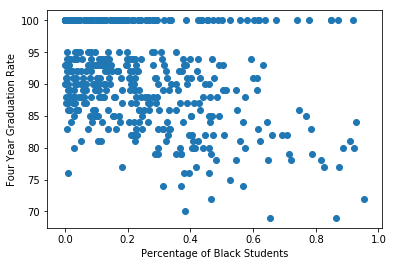

In [80]:
#correlation and scatter plot between percentage of black students and 4 year graduation rate
plot.scatter(schooldata17['BlackPct'],schooldata17['4-Year Cohort Graduation Rate Score'])

np.corrcoef(schooldata17['BlackPct'],schooldata17['4-Year Cohort Graduation Rate Score'])
plot.xlabel('Percentage of Black Students')
plot.ylabel('Four Year Graduation Rate')

The schools with a higher percentage of black students tend to have a lower graduation rate.

Text(0,0.5,'Four Year Graduation Rate')

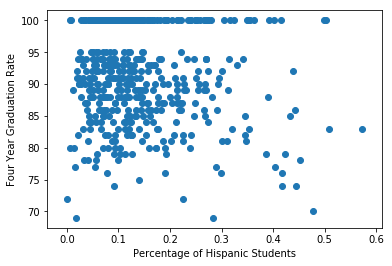

In [81]:
#correlation and scatter plot between percentage of hispanic students and 4 year graduation rate
plot.scatter(schooldata17[ 'HispanicPct'],schooldata17['4-Year Cohort Graduation Rate Score']) 

np.corrcoef(schooldata17[ 'HispanicPct'],schooldata17['4-Year Cohort Graduation Rate Score'])
plot.xlabel('Percentage of Hispanic Students')
plot.ylabel('Four Year Graduation Rate')

The schools with a higher percentage of hispanic students tend to have a lower graduation rate.

Text(0,0.5,'Four Year Graduation Rate')

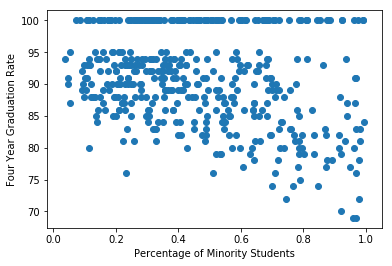

In [82]:
#correlation and scatter plot between percentage of minority students and 4 year graduation rate
plot.scatter(schooldata17['MinorityPct'],schooldata17['4-Year Cohort Graduation Rate Score']) 

np.corrcoef(schooldata17['MinorityPct'],schooldata17['4-Year Cohort Graduation Rate Score'])
plot.xlabel('Percentage of Minority Students')
plot.ylabel('Four Year Graduation Rate')

The schools with a high minority percentage tend to have a lower graduation rate.

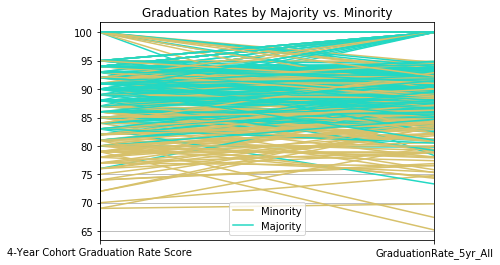

In [85]:
from pandas.plotting import parallel_coordinates

%matplotlib inline
parallel_coordinates(schooldata17, class_column = 'Majority',
cols = ['4-Year Cohort Graduation Rate Score', 'GraduationRate_5yr_All'])
_ = plt.title('Graduation Rates by Majority vs. Minority')
_ = plt.legend(loc = "lower center")

The plot above shows us that overall, Majority Minority schools have lower graduation rates in terms of both 4 and 5 years. The minimum rate for Minority is ~65% whereas the minimum rate for Majority is ~74%. 

### Crime/Discipline vs. Graduation Rate

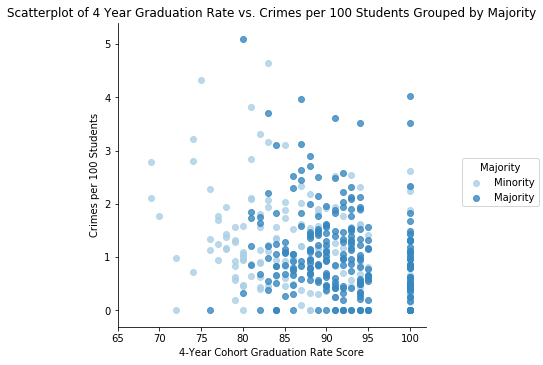

In [16]:
# Number of Crimes per 100 Students at the School Level
%matplotlib inline
sns.lmplot( x='4-Year Cohort Graduation Rate Score', y='crime_per_c_num', data=schooldata17, fit_reg=False, hue = 'Majority',legend=True, palette="Blues")
_ = plt.title('Scatterplot of 4 Year Graduation Rate vs. Crimes per 100 Students Grouped by Majority')
_ = plt.xticks([65,70,75,80,85,90,95,100])
#_ = plt.yticks([.80, .85, .90, .95, 1.00])
_ = plt.ylabel('Crimes per 100 Students')

This graph shows us that there is a slight negative correlation between crime rate and graduation rate. It is also interesting to note that most of the schools with both high crime rates and low graduation rates are majority minority. 

It is interesting to note as well that there is one school that has the highest crime rate (5/100) but also has an 80% graduation rate. This school is also a majority majority school which raises the question: Is this school being treated differently because of it's race composition? This could be a good school to look at further as we move forward with regression. 

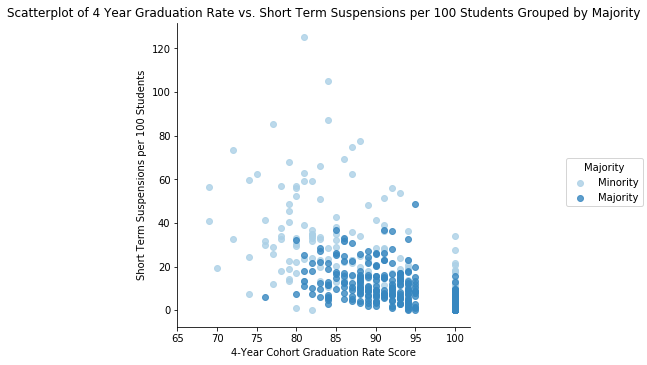

In [17]:
# Number of Short Term Suspensions per 100 Students
%matplotlib inline
sns.lmplot( x='4-Year Cohort Graduation Rate Score', y='short_susp_per_c_num', data=schooldata17, fit_reg=False, hue = 'Majority',legend=True, palette="Blues")
_ = plt.title('Scatterplot of 4 Year Graduation Rate vs. Short Term Suspensions per 100 Students Grouped by Majority')
_ = plt.xticks([65,70,75,80,85,90,95,100])
#_ = plt.yticks([.80, .85, .90, .95, 1.00])
_ = plt.ylabel('Short Term Suspensions per 100 Students')

There is a negative correlation between short terms suspensions and graduation rate. There is also very clear separation between the minority and majority schools, where the minority schools tend to have more short-term suspensions as well as lower graduation rates.

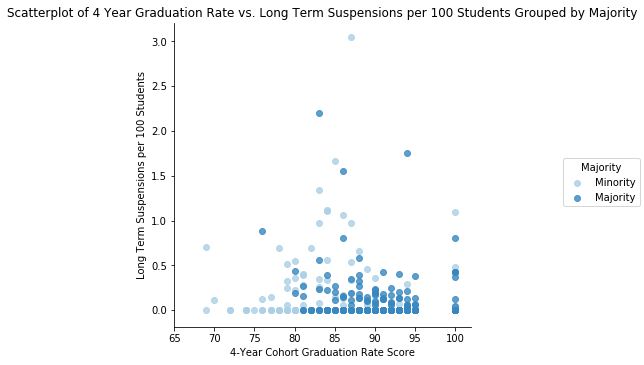

In [18]:
# Number of Long Term Suspensions per 100 Students
%matplotlib inline
sns.lmplot( x='4-Year Cohort Graduation Rate Score', y='long_susp_per_c_num', data=schooldata17, fit_reg=False, hue = 'Majority',legend=True, palette="Blues")
_ = plt.title('Scatterplot of 4 Year Graduation Rate vs. Long Term Suspensions per 100 Students Grouped by Majority')
_ = plt.xticks([65,70,75,80,85,90,95,100])
#_ = plt.yticks([.80, .85, .90, .95, 1.00])
_ = plt.ylabel('Long Term Suspensions per 100 Students')

Due to the increased severity of a long term suspension, it is not surprising that there are an increased number of schools who have had 0. That being said, of the schools who did not have 0, the separation between majority and minority schools is less severe. There is still evidence that the majority minority schools have more long term suspensions as well as a lower graduation rate, but there are also a good number of majority schools in there as well.   
* Again, there is a majority school that has the second largest number of suspensions that also has a graduation rate of ~84%.  
* There is also a minority school that has the highest number of long-term suspensions (3/100) and has a graduation rate of ~87%, which seems very high. This school could be a good one to look at in terms of how they are maintaining such a high graduation rate given their number of long term suspensions.    
* Looking specifically at the schools with 0 long-term suspensions, there is a somewhat clear separation between the majority and minority schools: the minority schools have a minimum graduation rate of 68% whereas the majority schools have a minimum of 81%. This tells us that long-term suspension is probably not the best predictor for graduation rate, especially when also looking at Majority.   

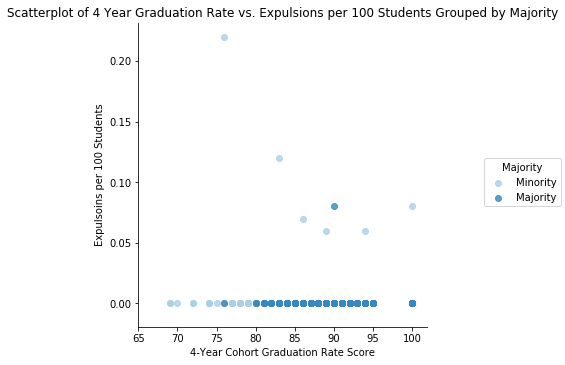

In [19]:
# Expulsions per 100 Students
%matplotlib inline
sns.lmplot( x='4-Year Cohort Graduation Rate Score', y='expelled_per_c_num', data=schooldata17, fit_reg=False, hue = 'Majority',legend=True, palette="Blues")
_ = plt.title('Scatterplot of 4 Year Graduation Rate vs. Expulsions per 100 Students Grouped by Majority')
_ = plt.xticks([65,70,75,80,85,90,95,100])
#_ = plt.yticks([.80, .85, .90, .95, 1.00])
_ = plt.ylabel('Expulsoins per 100 Students')

This plot does not tell us much since expulsions are the most extreme act a school can take on a student. That being said, it does tell us that minority schools are more likely to be expelled - there is only one majority school and 6 minority schools with any expulsions. In terms of graduation rates, there is a slightly negative correlation, although it is not very strong due to the fact that there are only 7 points of expulsion. 

Overall there were a few variables that had very interesting and fairly strong relationships with the target variable of four year graduation rate. To start the number of students in the school had a negative correlation with graduation rate. This means that all the schools that advertise their small class sizes are on to something. The more students at a school the less individual attention a student gets from a teacher which could mean they are not as interested in school as they could be which causes them to perform poorly and not graduate. Another claim that was supported by this data is that showing up to school actually matters. One of the strongest relationships seen was the one between average daily attendance and the four year graduation rate. This relationship makes sense for a couple reasons the first being that if students are showing up to school more they are attending more classes which means they are less likely to fall behind on material they missed while they were absent. A second reason this makes sense is that if a student is showing up to school more that means they are most likely interested in school and learning. In most cases people perform better at things they are interested in than things they do not enjoy. 

The next interesting set of relationships deals with what a school spends their money on. The correlation between salary expenses as a percent of total expenses and graduation rate was positive while the correlation between graduation rate and services and supplies expenses as a percentage of total expenses were both negative. This provides some insight on to what is important and what schools should be spending their money on. The positive correlation between salary and graduation should come as no surprise. The majority of salaries at a school are paid to teachers so if a school is investing a larger proportion of their expenses in salaries this means they are investing in their teachers. This sends a great message because the teachers are the ones that are actually interacting, inspiring and motivating the students. If a school is putting an emphasis on this then it would make sense that they have higher graduation rates. The negative correlations for services and supplies also support this point. Since these variables are a percentage of total expenses if a school has a higher percentage of service expense this means they have to be taking this money from another category. The negative correlation for these two variables is saying that taking money from another category, like salary, and putting it into supplies does not lead to a higher graduation rate. These three relationship support the notion that if a school wants to have a high graduation rate they need to focus on supporting their teachers.

The correlation for minority student percentage, Hispanic student percentage and black student percentage of a school and the graduation are all negative. This is a very sad relationship to see and supports the notion that students of color are not given the same opportunity as students of non-color. Graduation rate and the percentage of black students was the strongest of these three relationships. All three of these relationships are very concerning and make a claim that more support needs to be given to schools with a higher percentage of minorities because they are not performing as well in terms of graduation rate as schools with a lower percentage.

___

# New Features

<a id='New Features'></a>

### 4YearGradRateLevel

A new feature that will be added to the data and created from the '4-Year Cohort Graduation Rate Score' attribute will be called ‘4YearGradRateLevel’. This will be a categorical variable that will establish levels of “High”, “Medium”, and “Low”. These categories will be applied to records using the following logic:

* High = '4-Year Cohort Graduation Rate Score' >= 90%  
* Medium = '4-Year Cohort Graduation Rate Score' >= 80% and <90%  
* Low = '4-Year Cohort Graduation Rate Score' < 80%  

This feature will help with any issues that the masking of values in '4-Year Cohort Graduation Rate Score' greater than 95%.  Since this was a significant percentage of the data (26%), it will not matter that the values between 95 and 100 are missing, those values would be considered “High” regardless of what the true score was at time of reporting.

### Majority/Minority

We were also interested in analyzing schools that have majority white or minority students, so we created a new feature labled 'Majority' that splits the schools into 50% or greater white and 50% or greater minority.

In [84]:
#we need to add back in the MinorityPct variable
path = 'https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/2017/School%20Datasets/PublicHighSchools2017.csv'
responseData = pd.read_csv(path, low_memory=False)

#we are only interested in the MinorityPct variable and merging with the un=changed column unit_code
responseData = responseData[['unit_code', 'MinorityPct']]

#merge the response variable into the ML data
#what is the 'suffixes' option here
schooldata17 = schooldata17.merge(responseData, how='left', on='unit_code', suffixes = ('','_Drop'))

#creating a new dataframe `Minority Pct` with empty column `Majority`
MinorityPct = schooldata17[['MinorityPct']]
MinorityPct['Majority'] = ''

#filling the empty `Majority` column
for i in range(len(MinorityPct)):
    if MinorityPct.ix[i,0] < .5000:
        val = "Majority"
    else:
        val = "Minority"
    MinorityPct.ix[i,1] = val
    
#adds the `Majority` column to our dataset
schooldata17 = schooldata17.merge(MinorityPct, how='left', on='MinorityPct') #, suffixes = ('','_Drop'))

/Users/noellebrown/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/noellebrown/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/noellebrown/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

___

# Exceptional Work

<a id='Exceptional Work'></a>

### North Carolina Plot

Since this dataset contains geospatial data, the opportunity was taken to look at the high schools by location and size in North Carolina.  The schools were plotted on the map by their latitudinal and longitudinal coordinates.  Each school is represented by a red bubble that increases in size proportionately to the size of the school.  The results showed the majority of high schools cluster around 3 major cities, Charlotte, Raleigh, and Greensboro.  There were three smaller clusters around Asheville, Fayetteville, and Wilmington.  These results caused the team to consider the notion that not all schools are created equal, for example, a large school in a major city would not yield the same experience for a student at a small school in a rural area.  This led to a discussion with Dr. Drew about the possibility of aggregating the data at the Prosperity Zone level, which would be below the state level and above the district level.  It was decided that this route would be out of scope for this project and would be more appropriate for a longer study, perhaps a capstone project.

In [67]:
#The information at the following website is where John Heinen got the start for how to plot
#the map by school size and location:  http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/

import matplotlib.pyplot as plt
import matplotlib.cm
import warnings
import matplotlib.cbook
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import pandas as pd
import numpy as np

#Turn off deprecation warnings that are produced for version of matplotlib being used
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

#Get high school location data
#path="C:/Users/johnp/Desktop/profile_hs2.csv"
#using URL from John Heinen Github repository
#John Heinen used the addresses for the schools and mapped them to their longitude and latitudes
#this is what is contained in this file, by unit code
path = "https://raw.githubusercontent.com/jheinen001/MyRepository/master/profile_hs2.csv"
locData=pd.read_csv(path, low_memory=False)


#Review dataset contents before merging
schooldata17.info(verbose=False)
print('************************************************************')
locData.info(verbose=False)
print('************************************************************')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 469
Columns: 403 entries, student_num to unit_code
dtypes: float64(322), int64(81)
memory usage: 1.4 MB
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Columns: 8 entries, unit_code to Address components
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ KB
************************************************************


In [68]:
#Merge schoolData and testScores into a single file using school / unit code
schooldata17 = schooldata17.merge(locData, on='unit_code', how='left', suffixes=('_schoolData', '_locationData'))

#Making sure student_num is an integer for plotting purposes
schooldata17.student_num = schooldata17.student_num.astype(np.int64)

#Review dataset contents after merging
schooldata17.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 454
Columns: 410 entries, student_num to Address components
dtypes: float64(323), int64(82), object(5)
memory usage: 1.4+ MB


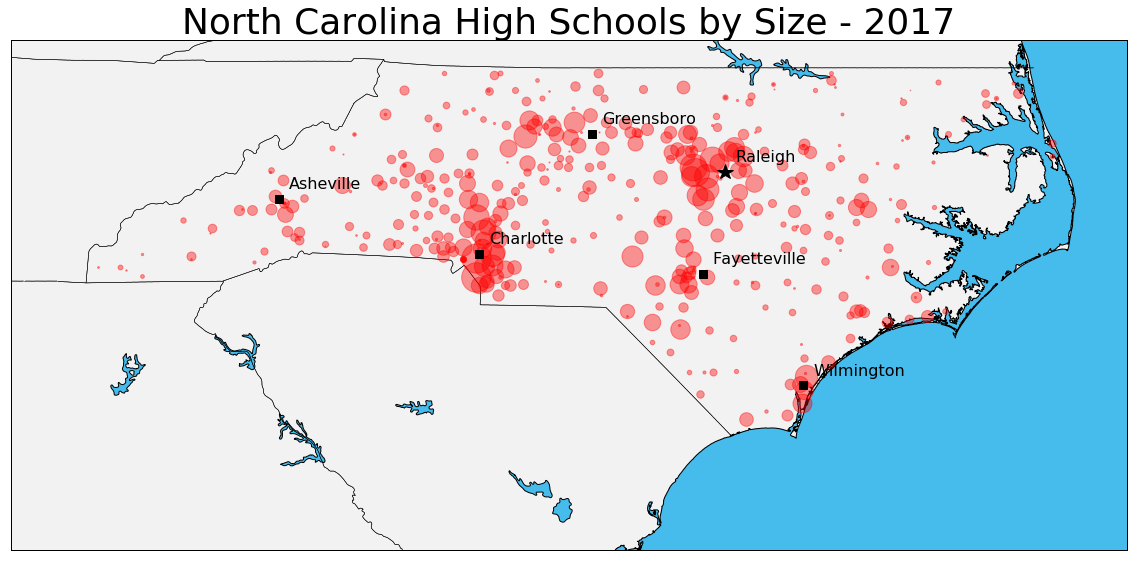

In [69]:
#Create a figure, with size for map
fig, ax = plt.subplots(figsize=(20,40))

#Establish map resolution, type, location, and range
m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=-80, lon_0=34.88,
            llcrnrlon=-85, llcrnrlat= 33, urcrnrlon=-75, urcrnrlat=36.75)

#add defining characteristics to map, boundaries (with color), land color, water color, coastlines, and state boundary
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.drawstates(linewidth=.5, linestyle='solid', color='k')

#set longitude and latitude of school locations
lons = np.array(schooldata17.Longitude)
lats = np.array(schooldata17.Latitude)

#set school size
count = np.array(schooldata17.student_num)

#establish what is being plotted
x, y = m(lons, lats)

#make sure data of location and size of school are together
for x1, y1, c in zip(x, y, count):
    # markersize is scale down by /100
    # need alpha<1 to get some transparency
    # red color is more appropriate
    m.plot(x1, y1, 'ro', markersize=c/100., alpha=0.4)


#Add Raleigh marker to map, Raleigh is the capital
Ral_lon = -78.6
Ral_lat = 35.8

xr,yr = m(Ral_lon, Ral_lat)
m.plot(xr, yr, 'k*', markersize=16)
plt.annotate('Raleigh',xy=(xr,yr),xytext=(10,10),textcoords='offset points',fontsize=16)

#Add Charlotte marker to map
Cha_lon = -80.8
Cha_lat = 35.2

xc,yc = m(Cha_lon, Cha_lat)
m.plot(xc, yc, 'ks', markersize=8)
plt.annotate('Charlotte',xy=(xc,yc),xytext=(10,10),textcoords='offset points',fontsize=16)

#Add Greensboro marker to map
Gre_lon = -79.79
Gre_lat = 36.07

xg,yg = m(Gre_lon, Gre_lat)
m.plot(xg, yg, 'ks', markersize=8)
plt.annotate('Greensboro',xy=(xg,yg),xytext=(10,10),textcoords='offset points',fontsize=16)

#Add Asheville marker to map
Ash_lon = -82.6
Ash_lat = 35.6

xa,ya = m(Ash_lon, Ash_lat)
m.plot(xa, ya, 'ks', markersize=8)
plt.annotate('Asheville',xy=(xa,ya),xytext=(10,10),textcoords='offset points',fontsize=16)

#Add Wilmington marker to map
Wil_lon = -77.9
Wil_lat = 34.23

xw,yw = m(Wil_lon, Wil_lat)
m.plot(xw, yw, 'ks', markersize=8)
plt.annotate('Wilmington',xy=(xw,yw),xytext=(10,10),textcoords='offset points',fontsize=16)

#Add Fayetteville marker to map
Fay_lon = -78.8
Fay_lat = 35.05

xf,yf = m(Fay_lon, Fay_lat)
m.plot(xf, yf, 'ks', markersize=8)
plt.annotate('Fayetteville',xy=(xf,yf),xytext=(10,10),textcoords='offset points',fontsize=16)

#Display cities and title on Map
plt.title("North Carolina High Schools by Size - 2017", fontsize=36);
plt.show()

### Masking/>95% Graduation Rate

As a follow up to the discussion in the Data Quality section, we decided to visualize the data provided for the graduation rates between 95%-99% due to masking of the original data.

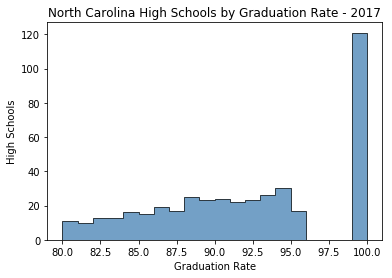

In [71]:
#Create histogram of graduation rate scores to highlight masking issue with data
x = schooldata17['4-Year Cohort Graduation Rate Score'][schooldata17['4-Year Cohort Graduation Rate Score'] >=80]

plt.xlabel('Graduation Rate')
plt.ylabel('High Schools')
plt.title("North Carolina High Schools by Graduation Rate - 2017")
plt.hist(x, bins=20, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='black');
plt.show()

While reviewing the ‘4-Year Cohort Graduation Rate Score’ attribute, it was noticed that there were no values between 95% and 100%.  This was a red flag as almost every percentage between 69% and 95% were represented in the data.  After mentioning this to Dr. Drew, he introduced us to the method of masking that was used on certain raw data files that contributed to our data set.

In order to anonymize the data so that no single students could possibly be identified using multiple data sets all schools that had percentages greater than 95% or less than 5% reported “>95” or “<5” respectively.  The records that contained these masked values were then set to 100% for the “>95” value and 0% for the “<5” value.  The masking and the imputation of the new values for masked records were applied to the raw data sets of SPG and accDrillDown.  The group will have to be aware of this when using any attributes that come from those raw data sets.

All records (26% of the data) that have 100% ‘4-Year Cohort Graduation Rate Score’ were originally reported as “>95”.  An actual score of 100% may or may not exist, but it would be impossible to know without the data being provided.
 
The histogram above highlights the gap between 95 and 100 due to masking when plotting all of the ‘4-Year Cohort Graduation Rate Score’ for each school.

### Correlation Code

In Dr. Drew's code to create the Machine Learning Datasets (which can be viewed [here](http://nbviewer.jupyter.org/github/jakemdrew/EducationDataNC/blob/master/2017/Machine%20Learning%20Datasets/Source%20Code/PublicHighSchools2017_ML.ipynb)), he mentions under the section titled 'Identify and Remove Highly Correlated Features' that "there must be a more Pythonic way" to "get the correlation values for every field combination." So, we decided to attempt to come up with a more Pythonic way to approach this. Below is the code to find variable pairs with correlations above a certain threshold. If you enter in 0.9 as the correlation threshold then the code makes one group of variables with correlations over 0.9 and another group with correlation under -0.9. The code that actually does this is the four lines in the middle  - the rest is just making it print out nice and neat.

In [93]:
from IPython.core.display import display as d

pd.set_option("display.max_rows",None)

#set the value you want to see variable pairs correlation greater than
correlation_value=.90

#find the correlations of all variable pairs and sort it
#then take only those with correlation greater than value entered
so=pd.DataFrame(schooldata17.corr().unstack().sort_values(kind="quicksort",ascending=False))
so.columns=["Correlation"]
pos=so[(so['Correlation']<1)&(so['Correlation']>correlation_value)]
neg=so[(so['Correlation']>-1)&(so['Correlation']<(-1*correlation_value))]

#print out results
if neg.shape[0]>0:
    print('Variables with negative correlation below threshold')
    d(neg)
else:    
    print('No variables with negative correlation below threshold')
    
print("")

if pos.shape[0]>0:
    print('Variables with positive correlation above threshold')
    d(pos)
else:
    print('No variables with positive correlation above threshold')

No variables with negative correlation below threshold

Variables with positive correlation above threshold


,,Correlation
MinorityPct,MinorityPct_Decile,0.983162
MinorityPct_Decile,MinorityPct,0.983162
EOG/EOCSubjects_GLP_LEP,EOCSubjects_GLP_LEP,0.956322
EOCSubjects_GLP_LEP,EOG/EOCSubjects_GLP_LEP,0.956322
EOG/EOCSubjects_CACR_SWD,EOCSubjects_CACR_SWD,0.955235
EOCSubjects_CACR_SWD,EOG/EOCSubjects_CACR_SWD,0.955235
attend_percentile,avg_daily_attend_pct,0.954808
avg_daily_attend_pct,attend_percentile,0.954808
student_num,student_num_decile,0.951044
student_num_decile,student_num,0.951044


___